In [2]:
cd ../jecs

/Users/dan/Documents/GitHub/ExpPro/jecs


In [3]:
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



In [1]:
import os

directory_path = '/Users/dan/Downloads/download'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
file_paths

['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root',
 '/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root',
 '/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']

In [39]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 

fp='/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root'
pts2=[]
etas2=[]
area2=[]
npvs2=[]
gen_pts2=[]
jecs2=[]
for current_pts2, current_etas2, current_area2, current_npvs2, current_gen_pts2, current_jecs2 in load_root_files(file_paths):
    pts2.extend(current_pts2)
    etas2.extend(current_etas2)
    area2.extend(current_area2)
    npvs2.extend(current_npvs2)
    gen_pts2.extend(current_gen_pts2)
    jecs2.extend(current_jecs2)



In [40]:
import numpy as np
pts3=np.array(pts2)
etas3=np.array(etas2)
area3=np.array(area2)
npvs3=np.array(npvs2)
gen_pts3=np.array(gen_pts2)
jecs3=np.array(jecs2)

In [41]:
mask = pts3 > 450
pts3 = pts3[mask]
etas3 = etas3[mask]
area3 = area3[mask]
npvs3 = npvs3[mask]
gen_pts3 = gen_pts3[mask]
jecs3 = jecs3[mask]

In [24]:
jecs2.shape

(15832506,)

In [42]:
import numpy as np
#jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)
x=np.transpose(np.array([pts2,etas2,area2,npvs2,gen_pts2]))
y=np.array(jecs2)

In [ ]:
# Load the dataset
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 


pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()
"""
pts.extend(pts2)
etas.extend(etas2)
area.extend(area2)
npvs.extend(npvs2)
gen_pts.extend(gen_pts2)
jecs.extend(jecs2)"""

jec_dataset = JetEnergyCorrectionDataset(pts, etas, area, npvs, gen_pts, jecs)

Test MSE: 137.17160034179688


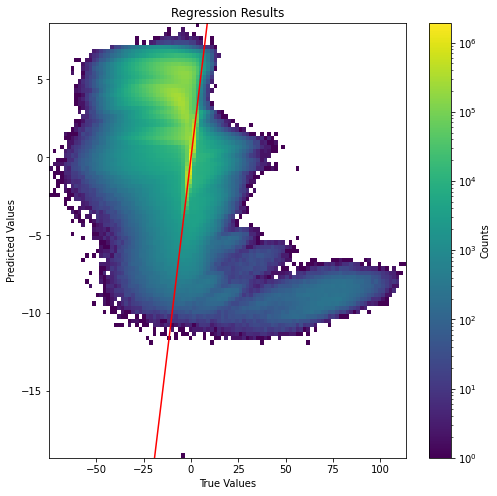

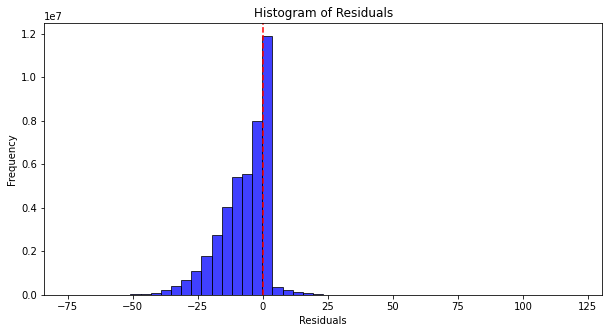

In [43]:
import importlib
import dataset
importlib.reload(dataset)

import eval_multiple_src as eval
from j_model import ShallowMLP

importlib.reload(eval)
eval.run(x,y)

In [6]:
y.shape

(15,)